In [39]:
import numpy as np 
import pandas as pd
import polars as pl
import joblib
import shap

In [40]:
df = pd.read_csv('./dataset/archive/formula_labeled_churn_data_final.csv')
# drop col churn_probability
df = df.drop(columns=['churn_probability'])
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,NaN,0
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0


## Exploratory Data Analysis

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

In [42]:
df.isnull().sum()

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                     12067
state                        0
county                   12067
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value        92286
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1638156
Churn                        0
dtype: int64

In [43]:
df['Churn'].value_counts()

Churn
0    1433742
1     247167
Name: count, dtype: int64

In [44]:
df.columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['marital_status'] = le.fit_transform(df['marital_status'])

joblib.dump(le, 'marital_status_encoder.pkl')

['marital_status_encoder.pkl']

In [46]:
# feat_cols = ['curr_ann_amt', 'days_tenure', 'age_in_years', 'income', 'has_children',
#        'length_of_residence', 'marital_status', 'home_owner', 'college_degree', 'good_credit']

feat_cols = ['curr_ann_amt', 'days_tenure', 'age_in_years', 'income', 'has_children',
   'marital_status', 'home_owner', 'good_credit']

X = df[feat_cols]
y = df['Churn']



In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

joblib.dump(model, 'logistic_regression_model.pkl')

/home/himanshu/Music/churn-prediction/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistic_regression_model.pkl']

In [49]:
# load model
# model = joblib.load('logistic_regression_model.pkl')

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [50]:
print(X_test.iloc[0])
print(y_pred_proba[0])

curr_ann_amt       1470.26587
days_tenure        2008.00000
age_in_years         55.00000
income            52500.00000
has_children          0.00000
marital_status        1.00000
home_owner            0.00000
good_credit           0.00000
Name: 1325124, dtype: float64
[0.17211075 0.82788925]


In [51]:
# Reduce the curr_ann_amt by 50% for the first record in X_test
x = X_test.iloc[0].copy()
x['curr_ann_amt'] = x['curr_ann_amt'] * 0.5
print(x)
print(model.predict_proba([x]))

curr_ann_amt        735.132935
days_tenure        2008.000000
age_in_years         55.000000
income            52500.000000
has_children          0.000000
marital_status        1.000000
home_owner            0.000000
good_credit           0.000000
Name: 1325124, dtype: float64
[[0.36707695 0.63292305]]


/home/himanshu/Music/churn-prediction/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
y_pred.sum()
# y_test.sum()

np.int64(28639)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8966973138633496

In [54]:
X_test.head()

,curr_ann_amt,days_tenure,age_in_years,income,has_children,marital_status,home_owner,good_credit
1325124,1470.265870,2008.0,55,52500.0,0.0,1,0.0,0.0
868254,590.240490,2287.0,80,125000.0,0.0,0,1.0,1.0
645354,892.648378,5060.0,46,47500.0,1.0,1,1.0,1.0
364721,533.626989,5485.0,48,62500.0,1.0,1,1.0,1.0
1362823,906.546585,6291.0,82,17500.0,1.0,0,0.0,1.0


In [55]:
import shap

# Initialize JavaScript visualization in the notebook
shap.initjs()

# Create an explainer object. We use shap.Explainer, which automatically selects the
# best explainer for your model (in this case, for Logistic Regression).
# We pass the trained model and the training data.
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the test set. This tells us how much each feature
# contributed to the prediction for each customer in the test data.
shap_values = explainer(X_test)

joblib.dump(explainer, 'shap_explainer.pkl')

['shap_explainer.pkl']

SHAP Summary Plot


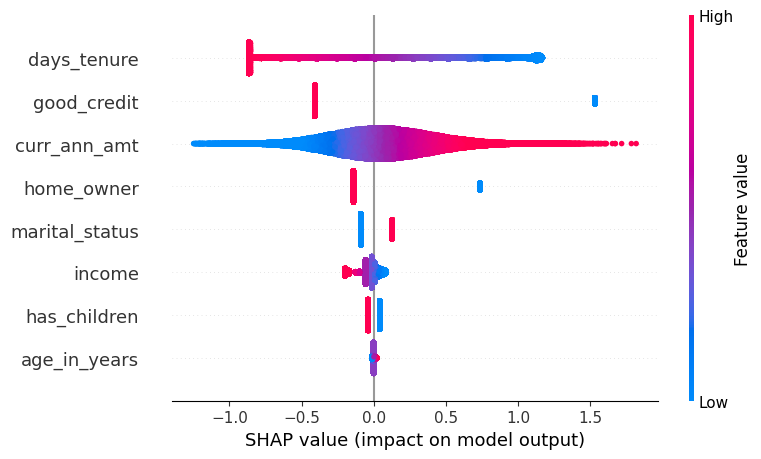

In [56]:
# --- GLOBAL FEATURE IMPORTANCE ---
# Create a SHAP summary plot to see which features are most important.
# The beeswarm plot is powerful:
# - Each dot represents a customer.
# - The color indicates the feature's value (red = high, blue = low).
# - The position on the x-axis shows the impact of that feature on the model's output
#   (a positive SHAP value increases the prediction towards churn).

print("SHAP Summary Plot")
shap.summary_plot(shap_values, X_test)

In [57]:
# --- LOCAL EXPLANATION FOR A SINGLE PREDICTION ---
# We can visualize the explanation for a single customer. Let's pick the first one.
# The force plot shows:
# - The model's base value (the average prediction over the dataset).
# - Features in red pushed the prediction higher (towards churn).
# - Features in blue pushed the prediction lower (towards not churning).

print("Force plot for the first customer in the test set:")
shap.force_plot(explainer.expected_value, shap_values.values[0,:], X_test.iloc[0,:])

Force plot for the first customer in the test set:
